In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/MyDrive/Colab_Notebooks/CNN'

x = []
y = []

In [ ]:
# 定義ImageDataGenerator
img_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=10, 
                             width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)

In [ ]:
n = 1
for p in os.listdir(path1):
    path2 = path1 + f'/{p}'
    print(p)
    for i in os.listdir(path2):
        img = cv2.imread(f'{path2}/{i}')
        img = cv2.resize(img, (28, 28))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Cv2讀進來是BGR，轉成RGB
        x.append(np.array(img))
        y.append(str(p))

iMeiMilk
ReiSuiMilk
LimFengInMilk
JuHsiangMilk


In [ ]:
# Label encoding
label = LabelEncoder()
y = label.fit_transform(y)
y = to_categorical(y, 4)
x = np.array(x)
x = x / 255

In [ ]:
x_train[:5]

NameError: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=1)
img_gen.fit(x_train)
print(x_train.shape, x_train.ndim)
print(y_train.shape, y_train.ndim)

(85, 28, 28, 3) 4
(85, 4) 2


In [ ]:
# model-1: 0.7857(epoch = 40 or 50)
# i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
# x = Flatten()(x)
# x = Dropout(0.2)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(4, activation='softmax')(x)

# model-2: 0.2413
# i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
# x = BatchNormalization()(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# # x = Dropout(0.2)(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# # x = Dropout(0.2)(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# # x = Dropout(0.2)(x)
#
# # x = GlobalMaxPooling2D()(x)
# x = Flatten()(x)
# x = Dropout(0.2)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(4, activation='softmax')(x)

# model-3: 0.7778(epoch = 100 or 200)
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

In [ ]:
model = Model(i, x)
batch_size = 32
steps_per_epoch = x_train.shape[0] // batch_size
model.compile(optimizer='adam', loss='categorical_crossentropy',  # for 2D y
              metrics=['accuracy'])

In [ ]:
# training model
r = model.fit_generator(img_gen.flow(x_train, y_train, batch_size=batch_size), epochs=200,
                        validation_data=(x_test, y_test), verbose=1, steps_per_epoch=steps_per_epoch)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/200
2/2 [==============================] - 1s 322ms/step - loss: 1.3686 - accuracy: 0.3585 - val_loss: 1.3066 - val_accuracy: 1.0000
Epoch 2/200
2/2 [==============================] - 0s 66ms/step - loss: 1.2982 - accuracy: 0.3774 - val_loss: 1.2415 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 62ms/step - loss: 1.2361 - accuracy: 0.3962 - val_loss: 1.1577 - val_accuracy: 0.0000e+00
Epoch 4/200
2/2 [==============================] - 0s 72ms/step - loss: 1.1829 - accuracy: 0.4531 - val_loss: 1.0794 - val_accuracy: 0.0000e+00
Epoch 5/200
2/2 [==============================] - 0s 60ms/step - loss: 1.1845 - accuracy: 0.4528 - val_loss: 0.9872 - val_accuracy: 0.0000e+00
Epoch 6/200
2/2 [==============================] - 0s 68ms/step - loss: 1.0700 - accuracy: 0.6038 - val_loss: 0.9367 - val_accuracy: 0.0000e+00
Epoch 7/200
2/2 [==============================] - 0s 65ms/step - loss: 1.1391 - accuracy: 0.4219 - val_loss: 0.9446 - val_accuracy: 0.0000

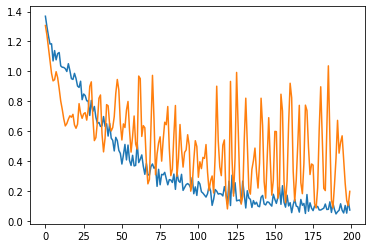

In [ ]:
# 每迭代繪製損失
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

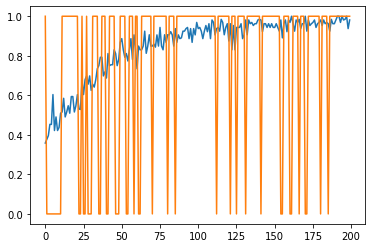

In [ ]:
# 每迭代繪製精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.show()

In [ ]:
# 總結模型各層形狀與使用參數
model.summary()